# Softmax Pytorch <br>    

In the example, we have **two kinds** of inputs:<br> <br>
**1:M:28×28 matrixes:**  
$$M=\left(\begin{array}{cccc} a_{1,1}& a_{1,2} & \cdots & a_{1,28} \\ a_{2,1} & a_{2,2} & \cdots & a_{2,28} \\ \vdots & \vdots & \ddots & \vdots \\a_{28,1} & a_{28,2}&\cdots & a_{28,28} \end{array} \right)$$ <br> **2:And a digit *t*:** $\left[n\right]$ <br> <br>
The method is to predict the digit (from 0 to 9) from the M.<br>
To do that, we first are going to transform M to a 28×28 row matrix: 
$M'=\left[ \begin{array}{c} a_{1,1} & \cdots & a_{1,28} &\cdots&\cdots& a_{28,1} &\cdots& a_{28,28}\end{array} \right]$  
<br>The model is as follows:<br><br>
$$\large Y_{1\times 10}=M'_{1\times 28^2}W_{28^2\times10}+B_{1\times10}$$<br><br>
$$\left[\begin{array}{c} y_{1,1}&y_{1,2}&\cdots&y_{1,10}\end{array}\right]=\left[ \begin{array}{c} a_{1,1} & \cdots & a_{1,28} &\cdots&\cdots& a_{28,1} &\cdots& a_{28,28}\end{array} \right]\left[\begin{array}{cccc} w_{1,1}& w_{1,2} & \cdots & w_{1,10} \\ w_{2,1} & w_{2,2} & \cdots & w_{2,10} \\ \vdots & \vdots & \ddots & \vdots \\w_{28^2,1} & w_{28^2,2}&\cdots & w_{28^2,10} \end{array} \right]+ \left[\begin{array}{c} b_{1,1}&b_{1,2}&\cdots&b_{1,10}\end{array}\right] $$ <br>
Then apply *** Cross Entropy Loss ***, we transform Y to a Logistical Function and choose the cell whose value is the maximum of the components. Finally the cell selected will be compared with **t**:<br><br>
$$\large \left[\begin{array}{cccc} y_1\\y_2\\ \vdots \\ y_{10}\end{array}\right] \Rightarrow    \left[\begin{array}{cccc} P_1=\frac{e^{y_1}}{e^{y_1}+ e^{y_2}...+e^{y_{10}}}\\ P_2= \frac{e^{y_2}}{e^{y_1}+ e^{y_2}...+e^{y_{10}}}  \\ \vdots \\ P_{10}= \frac{e^{y_{10}}}{e^{y_1}+ e^{y_2}...+e^{y_{10}}} \end{array}\right] \Rightarrow \theta(max(P))\approx t   
$$ 

In [1]:
import torch as pt
import torch.nn as nn
import torchvision.transforms as transforms

Importing `Dataset` from $Pytorch$:

In [2]:
import torchvision.datasets as dsets

Importing *Matplotlib*:

In [3]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Train and Validation data:
Remember:
```python
train_datos=dsets.MNIST(.....,train=True,....)
validation_datos=dsets.MNIST(.....,train=False,....)
```

In [4]:
train_dataset= dsets.MNIST(root='./data',train=True,download=True,transform=transforms.ToTensor())
validation_dataset=dsets.MNIST(root='./data',train=False,download=True,transform=transforms.ToTensor())

In [5]:
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [6]:
len(train_dataset)

60000

In [7]:
validation_dataset[0][0].shape

torch.Size([1, 28, 28])

In [8]:
len(validation_dataset)

10000

Defining `SoftMax`:

In [9]:
class SoftMax(nn.Module):
    def __init__(self,in_size,output_size):
        super(SoftMax,self).__init__()
        self.linear=nn.Linear(in_size,output_size)
    
    def forward(self,x):
        out = self.linear(x)
        return(out)    

In [10]:
input_dim=28*28
output_dim=10

In [11]:
model=SoftMax(input_dim,output_dim)

In [12]:
print('W=',list(model.parameters())[0].size())
print('b=',list(model.parameters())[1].size())

W= torch.Size([10, 784])
b= torch.Size([10])


In [13]:
criterion=nn.CrossEntropyLoss()

## Train and validation loader:

In [14]:
train_loader=pt.utils.data.DataLoader(dataset=train_dataset,batch_size=100)
validation_loader=pt.utils.data.DataLoader(dataset=validation_dataset,batch_size=5000)

## Running the program:

In [15]:
loss_list=[]
accuracy_list=[]
optimizer=pt.optim.SGD(model.parameters(),lr=0.01)
for epoch in range(100):
    for x,y in train_loader:
        optimizer.zero_grad()
        z= model(x.view(-1,28*28))
        loss=criterion(z,y)
        loss.backward()
        optimizer.step()
    correct=0
    for x_test,y_test in validation_loader:
        z= model(x_test.view(-1,28*28))
        _,yhat=pt.max(z.data,1)
        correct += (yhat==y_test).sum().item()
    accuracy= correct/len(validation_dataset)
    accuracy_list.append(accuracy)
    loss_list.append(float(loss))

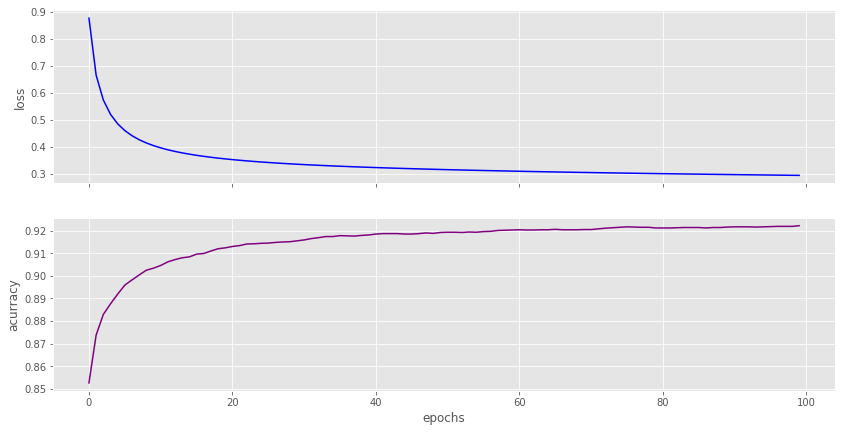

In [16]:
fig,ax=plt.subplots(2,1,sharex=True,figsize=(14,7))
ax[0].plot(loss_list,color='blue')
ax[0].set( ylabel='loss')
ax[1].plot(accuracy_list,color='purple')
ax[1].set( ylabel='acurracy')
plt.xlabel('epochs')
plt.show()

* It shows a very low and expensive convergence.
* The lower the loss value , the higher acurracy is.